<a href="https://colab.research.google.com/github/rehammahal/Arms_Movement_with_Six_Servos/blob/main/Task1_STCVisualWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & Data Wrangling


In [ ]:
!pip install pyxlsb
import pyxlsb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving stc TV Data Set_T1.xlsb to stc TV Data Set_T1.xlsb


In [ ]:
df = pd.read_excel('stc TV Data Set_T1.xlsb')
df.shape


(1048575, 13)

In [ ]:
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
df = df.drop(columns=['Column1'])
df['program_name'] = df['program_name'].str.strip()
df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str)
df.head()

<ipython-input-19-9e77a178c4da>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')


,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
df.describe()

,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [ ]:
df.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

# Task One

The most watched movies

In [ ]:
df = df.copy()

In [54]:
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['hd', 'program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['hd','program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)
grouped.head(35)

,hd,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,1,The Boss Baby,MOVIE,3348,23625,2889.027778
1,1,The Expendables,MOVIE,853,2119,1961.159444
2,1,Moana,MOVIE,2112,7521,1540.544444
3,1,Trolls,MOVIE,2584,13609,1512.580278
4,1,Bean,MOVIE,949,3617,1423.955000
5,0,The murfs,MOVIE,867,3132,1342.141111
6,0,The Amazing pider-Man,MOVIE,672,1790,1183.651667
7,0,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
8,1,The Man With The Iron Fists,MOVIE,707,2505,859.626389
9,1,The Amazing pider-Man,MOVIE,443,1087,782.467500


In [ ]:
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='The top 10 programs in total watch time in houres')
fig.show()

# 1st - Which program class users most whatched?

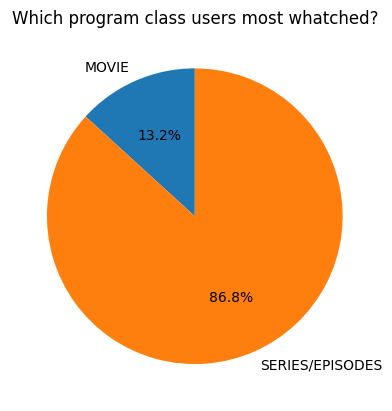

In [43]:
grouped1 = grouped.copy()
category = grouped1.groupby('program_class')
categoryCount = category.size()
categoryCount.plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Which program class users most whatched?')
plt.show()



# 2nd - Total watch time vs. no of  users who watched


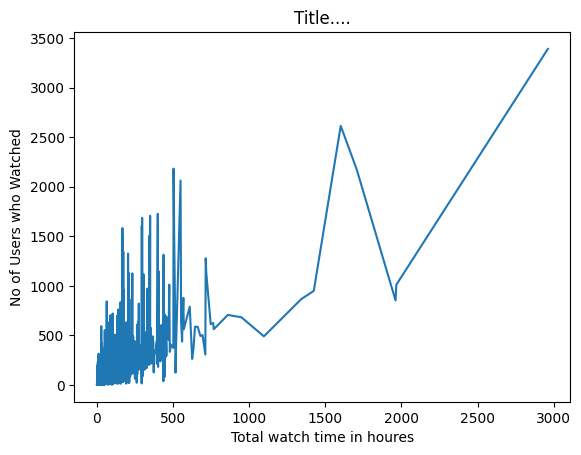

In [51]:
grouped2 = grouped1.copy()
x = grouped2['Total watch time in houres']
y = grouped2['No of Users who Watched']
plt.plot(x,y)
plt.xlabel('Total watch time in houres')
plt.ylabel('No of Users who Watched')
plt.title('Total watch time vs. no of  users who watched')
plt.show()

# 3rd - Which video quality users most watched


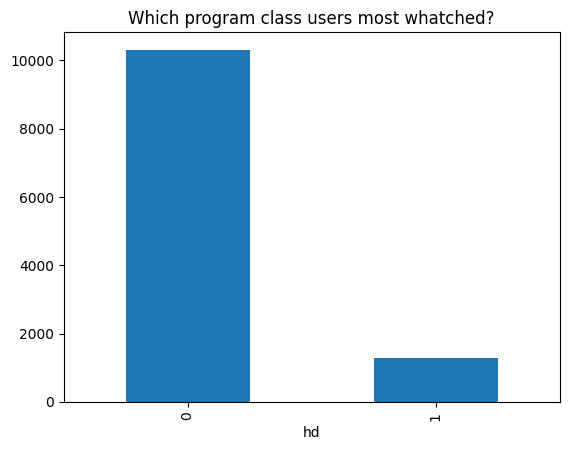

In [62]:
grouped1 = grouped.copy()
category = grouped1.groupby('hd')
categoryCount = category.size()
categoryCount.plot(kind='bar')
plt.title('Which video quality users most watched?')
plt.show()